---
title: "DH140 Final Project"
description: "Harry Potter Books"
author: "Tina Huang"
date: "03/10/2023"
date-modified: "03/17/2023"
---

# The Hidden Story Within Harry Potter Books
DH140 Final Project  
Created by Tina Huang  
3/20/2023

## Introduction

For my final project, I will be analyzing the 7 *Harry Potter* books by J.K. Rowling. [The dataset](https://github.com/formcept/whiteboard/tree/master/nbviewer/notebooks/data/harrypotter) can be found on Github. I wanted to analyze this data because I grew up reading the books and have a renewed interest since the game "Hogwarts Legacy" recently came out. Using data analysis, is there is a significant different in sentiment over the course of each book, as well as compared across all 7 books? Additionally, how do the relationships between the characters change over the 7 books?

## Methods

### Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def readTextFile(fileName):
    fileString = ""
    
    with open(fileName, 'r') as f:
        for line in f:
            if not line.startswith("Page | ") and line.strip():
                fileString += " " + line.strip()
                
    return fileString

book1_str = readTextFile("data/Book 1 - The Philosopher's Stone.txt")
book2_str = readTextFile("data/Book 2 - The Chamber of Secrets.txt")
book3_str = readTextFile("data/Book 3 - The Prisoner of Azkaban.txt")
book4_str = readTextFile("data/Book 4 - The Goblet of Fire.txt")
book5_str = readTextFile("data/Book 5 - The Order of the Phoenix.txt")
book6_str = readTextFile("data/Book 6 - The Half Blood Prince.txt")
book7_str = readTextFile("data/Book 7 - The Deathly Hallows.txt")

book_dict = {"The Philosopher's Stone": book1_str, 
             "The Chamber of Secrets": book2_str, 
             "The Prisoner of Azkaban": book3_str, 
             "The Goblet of Fire": book4_str, 
             "The Order of the Phoenix": book5_str, 
             "The Half Blood Prince": book6_str, 
             "The Deathly Hallows": book7_str}

## Results  

### Sentiment Analysis

I am analyzing the evolution of sentiment within the books. First, I want to take a look at the most common positive and negative words within the first book to get a sense of what themes may be present.  

Then, I will analyze the evolution of sentiment by taking sections of 500 words and calculating the average sentiment for each section.

In [2]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.sentiment import vader
from nltk.corpus import stopwords
from nltk.corpus import opinion_lexicon
from nltk.stem.porter import PorterStemmer
from string import punctuation

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('opinion_lexicon')

sia = vader.SentimentIntensityAnalyzer()

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


In [3]:
# analyzing book 1
pos_words = []
neg_words = []

for word in book1_str.split():
  comp_score = sia.polarity_scores(word)['compound']
  if comp_score > 0:
    pos_words.append(word)
  elif comp_score < 0:
    neg_words.append(word)

Text(0.5, 1.0, "Most Common Positive words in 'The Philosopher's Stone'")

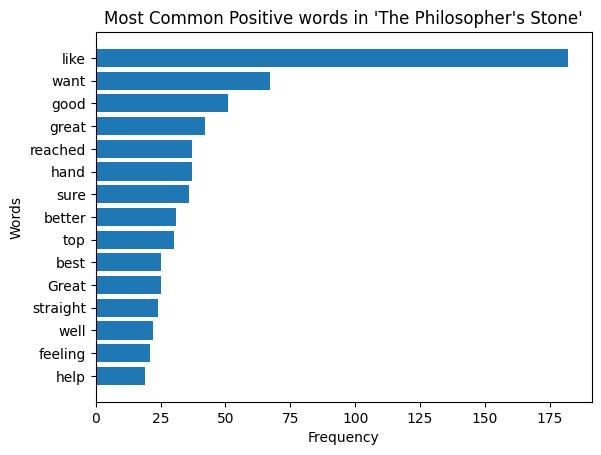

In [4]:
pos_items = nltk.FreqDist(pos_words).most_common(15)
x, y = zip(*pos_items)
x = reversed(x)
y = reversed(y)
plt.barh(list(x), list(y))
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Most Common Positive words in 'The Philosopher's Stone'")

Text(0.5, 1.0, "Most Common Negative words in 'The Philosopher's Stone'")

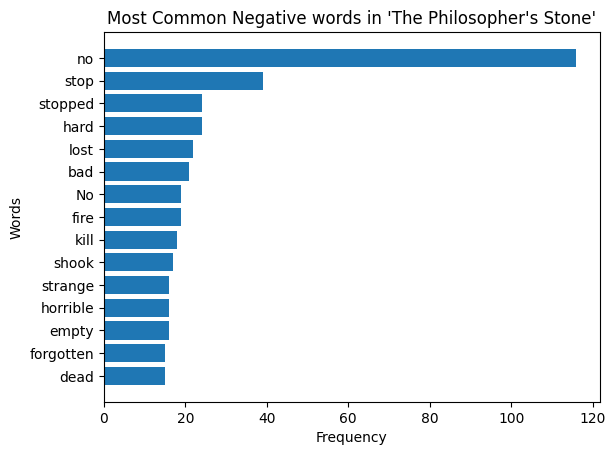

In [5]:
neg_items = nltk.FreqDist(neg_words).most_common(15)
x, y = zip(*neg_items)
x = reversed(x)
y = reversed(y)
plt.barh(list(x), list(y))
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Most Common Negative words in 'The Philosopher's Stone'")

Through the previous 2 graphs, we can gather some overall themes of the first book, *The Philosopher's Stone*. The most common positive words don't give much indication of the themes, but the negative words convey a somber tone for the book. The words "kill", "strange", "horrible", "empty", "forgotten", and "dead" suggest themes of isolation and pain, which connects to the abuse Harry Potter experiences after his parents died and left him in the care of the abusive Durselys.

In [6]:
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

def sentiment_score(word):
    if word in positive_words:
        return 1
    elif word in negative_words:
        return -1
    else:
        return 0

def total_sentiment_score(book_string):
    words = []
    sent = sent_tokenize(book_string)

    for s in sent:
        for w in word_tokenize(s):
            words.append(w)
    
    # calculate score for each block of 500 words
    scores = []
    i = 0
    x = 0
    
    while i < len(words) - 500:
      score = 0
      for j in range(500):
        score += sentiment_score(words[x])
        x += 1
      scores.append(score)
      i += 500
        
    return scores

In [7]:
book1_scores = total_sentiment_score(book1_str)
book2_scores = total_sentiment_score(book2_str)
book3_scores = total_sentiment_score(book3_str)
book4_scores = total_sentiment_score(book4_str)
book5_scores = total_sentiment_score(book5_str)
book6_scores = total_sentiment_score(book6_str)
book7_scores = total_sentiment_score(book7_str)

Originally, I wished to plot all 7 books' sentiment scores on the same graph, but I realized quickly that it would become way too messy and difficult to read. Therefore, I selected books in groups of 2 based on similar word count lengths and chronological order.

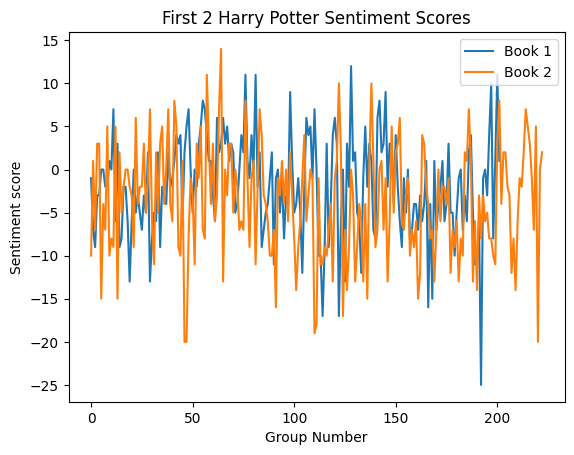

In [8]:
# books 1 and 2
fig, ax = plt.subplots()
l1, = ax.plot(range(len(book1_scores)), book1_scores)
l2, = ax.plot(range(len(book2_scores)), book2_scores)
ax.set_xlabel("Group Number")
ax.set_ylabel("Sentiment score")
ax.set_title("First 2 Harry Potter Sentiment Scores")
ax.legend((l1, l2), ('Book 1', 'Book 2'), loc='upper right')

I first selected books 1 and 2 to compare together since they have similar word count lengths. This graph shows that the change in sentiment over time is pretty similar for books 1 and 2. Both books reach a low negative sentiment towards the end of the book, but then increase to a positive sentiment at the very end. The major differences are that in book 2, there is a big decrease in sentiment around group 50, which is roughly in the first 1/4 or 1/5 of the book.

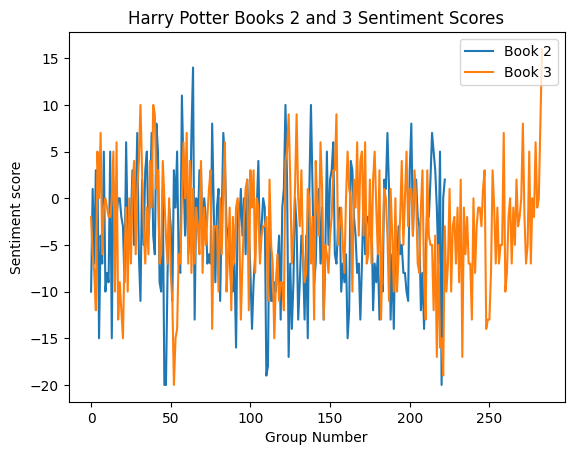

In [9]:
# books 2 and 3
fig, ax = plt.subplots()
l2, = ax.plot(range(len(book2_scores)), book2_scores)
l3, = ax.plot(range(len(book3_scores)), book3_scores)
ax.set_xlabel("Group Number")
ax.set_ylabel("Sentiment score")
ax.set_title("Harry Potter Books 2 and 3 Sentiment Scores")
ax.legend((l2, l3), ('Book 2', 'Book 3'), loc='upper right')

I then compared the sentiment scores of books 2 and 3 because they also had similar word counts. Though book 3's length is greater than book 2, the sentiment scores up to the end of book 2 follow a very similar trend. Around group number 50, both books have a sharp decrease in sentiment score. Around group 225, there is another sharp decrease in sentiment score. This implies that these books follow a similar narrative structure. 

Book 2 has a much more maximum negative sentiment value of around -20, whereas its maximum positive sentiment value is around 14. This shows that book 2 may discuss more overall negative themes. Book 3 has an overall more negative sentiment score for the majority of the book, but then increases from -20 to 15 during the last portion of the book.

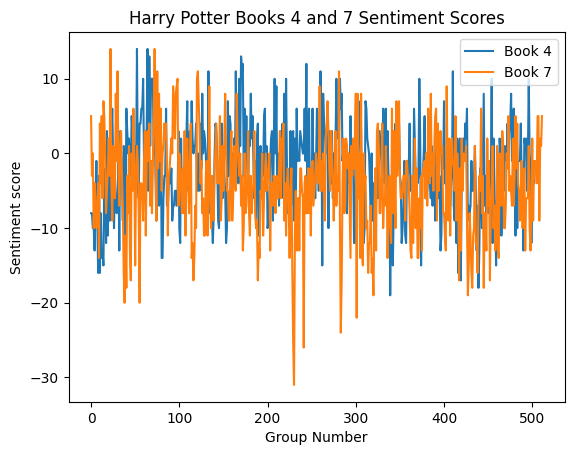

In [10]:
# books 4 and 7
fig, ax = plt.subplots()
l4, = ax.plot(range(len(book4_scores)), book4_scores)
l7, = ax.plot(range(len(book7_scores)), book7_scores)
ax.set_xlabel("Group Number")
ax.set_ylabel("Sentiment score")
ax.set_title("Harry Potter Books 4 and 7 Sentiment Scores")
ax.legend((l4, l7), ('Book 4', 'Book 7'), loc='upper right')

I analyzed books 4 and 7 because they have very similar word count lengths. These books are a little more different than the previous graphs, possibly due to the greater gap in time between when the books were written and published. Book 7 has an overall more negative sentiment, with a huge decrease in sentiment around group 225. Book 4 averages around a sentiment score of 0, but starts becoming slightly more negative towards the end of the book.

### Network Visualization

I created network graphs of the characters' relationships by counting the frequencies of interactions between characters. The frequency of interactions was counted by seeing if 2 characters' names occured one after another. Then, I created a network graph with these character interactions.

Something that was challenging was figuring out when characters interacted with each other; unlike a play where the script says the full name of the character that's speaking, a novel may refer to people by their first name, last name, both first and last name, or by a nickname. Additionally, their name may not be specified each time during the dialogue; pronouns may be used where the reader has to use reading comprehension to figure out who the pronoun is referring to. Additionally, many characters are related and have the same last name, so readers have to use reading comprehension to know which character is being referred to.

To simplify things, I modified the character list to include only the most common names each character is referred to as. I determined this by mostly using people's first names, or using my knowledge of the books plus the help of the internet. For example, the name "Mr. Potter" is ambiguous because we don't know which Potter that is. So, I only include "Harry", "Albus", and "James" since these are unique first names to differentiate the Potter men. 

In [11]:
import networkx as nx
from bokeh.io import output_notebook, show, save
from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine, EdgesAndLinkedNodes, NodesAndLinkedEdges, LabelSet
from bokeh.plotting import figure
from bokeh.plotting import from_networkx
from bokeh.palettes import Blues8, Reds8, Purples8, Oranges8, Viridis8, Spectral8
from bokeh.transform import linear_cmap
from networkx.algorithms import community

In [12]:
char_names = [ "Harry", "Hermione", "Ron", "Dumbledore", "Luna", "Dobby", "Hagrid", "Lupin", "Neville", "Lilly", "Tonks", 
             "James", "Fleur", "Crabbe", "Malfoy", "Albus", "Narcissa", "George", "Percy", "Molly", "Dudley",
             "Slughorn", "Lily", "Fitwick", "Petunia", "Helena", "Vernon", "Lockhart", "Viktor", "Patil", "Ted", "Noris" ]

# return a dictionary that maps the frequency of characters' interactions
# represents a bidirectional relationship between character names to the frequency of their interactions
def find_char_relations(book_string):
  char_dict = {}
  prev_char = "Harry"
  words = []
  sent = sent_tokenize(book_string)

  for s in sent:
      for w in word_tokenize(s):
          words.append(w)
            
  for word in words:
    if word in char_names and word != prev_char:
      if (prev_char, word) in char_dict:
        char_dict[(prev_char, word)] += 1
      elif (word, prev_char) in char_dict:
        char_dict[(word, prev_char)] += 1
      else:
        char_dict[(prev_char, word)] = 1
      prev_char = word

  return char_dict

def plot_char_relations(book_str, bookNum):
  book_chars = find_char_relations(book_str)

  # convert to a dataframe
  tuples = book_chars.keys()
  df = pd.DataFrame({'Source': [tuple[0] for tuple in tuples],
                     'Target': [tuple[1] for tuple in tuples],
                     'Weight': book_chars.values()})
  book_chars = {v:k for k,v in dict(pd.Series(list(set(df.Target.unique()).union(set(df.Source.unique())))).astype("category")).items()}
  book_charindex_dict = {v:k for k,v in book_chars.items()}
  df['SourceIndex'] = [book_chars[i] for i in df['Source'].values]
  df['TargetIndex'] = [book_chars[i] for i in df['Target'].values]

  G = nx.from_pandas_edgelist(df, 'SourceIndex', 'TargetIndex', 'Weight')
  nx.set_node_attributes(G, name='charname', values=book_charindex_dict)

  #Choose colors for node and edge highlighting
  node_highlight_color = 'white'
  edge_highlight_color = 'black'

  #Choose attributes from G network to size and color by — setting manual size (e.g. 10) or color (e.g. 'skyblue') also allowed
  size_by_this_attribute = 'adjusted_node_size'
  color_by_this_attribute = 'modularity_color'

  #Pick a color palette — Blues8, Reds8, Purples8, Oranges8, Viridis8
  color_palette = Blues8

  #Choose a title!
  title = 'Harry Potter Book ' + str(bookNum) + ' Network' 

  #Establish which categories will appear when hovering over each node
  HOVER_TOOLTIPS = [
      ("Character", "@index"),
      ("Degree", "@degree"),
      ("Modularity Class", "@modularity_class"),
      ("Modularity Color", "$color[swatch]:modularity_color"),
  ]

  #Create a plot — set dimensions, toolbar, and title
  plot = figure(tooltips = HOVER_TOOLTIPS,
                tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom',
                x_range=Range1d(-10.1, 10.1), y_range=Range1d(-10.1, 10.1), title=title)

  #Create a network graph object
  # https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.drawing.layout.spring_layout.html
  network_graph = from_networkx(G, nx.spring_layout, scale=10, center=(0, 0))

  #Set node sizes and colors according to node degree (color as category from attribute)
  network_graph.node_renderer.glyph = Circle(size=size_by_this_attribute, fill_color=color_by_this_attribute)
  #Set node highlight colors
  network_graph.node_renderer.hover_glyph = Circle(size=size_by_this_attribute, fill_color=node_highlight_color, line_width=2)
  network_graph.node_renderer.selection_glyph = Circle(size=size_by_this_attribute, fill_color=node_highlight_color, line_width=2)

  #Set edge opacity and width
  network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.3, line_width=1)
  #Set edge highlight colors
  network_graph.edge_renderer.selection_glyph = MultiLine(line_color=edge_highlight_color, line_width=2)
  network_graph.edge_renderer.hover_glyph = MultiLine(line_color=edge_highlight_color, line_width=2)

  #Highlight nodes and edges
  network_graph.selection_policy = NodesAndLinkedEdges()
  network_graph.inspection_policy = NodesAndLinkedEdges()

  plot.renderers.append(network_graph)

  #Add Labels
  x, y = zip(*network_graph.layout_provider.graph_layout.values())
  node_labels = list(G.nodes())
  source = ColumnDataSource({'x': x, 'y': y, 'name': [book_charindex_dict[i] for i in node_labels]})
  labels = LabelSet(x='x', y='y', text='name', source=source, background_fill_color='white', text_font_size='10px', background_fill_alpha=.7)
  plot.renderers.append(labels)

  output_notebook()
  show(plot)
  save(plot, filename=f"{title}.html")

In [13]:
plot_char_relations(book1_str, 1)

Loading BokehJS ...

/tmp/ipykernel_284/446730918.py:103: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  save(plot, filename=f"{title}.html")
/tmp/ipykernel_284/446730918.py:103: UserWarning: save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'
  save(plot, filename=f"{title}.html")


In [14]:
plot_char_relations(book2_str, 2)

Loading BokehJS ...

/tmp/ipykernel_284/446730918.py:103: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  save(plot, filename=f"{title}.html")
/tmp/ipykernel_284/446730918.py:103: UserWarning: save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'
  save(plot, filename=f"{title}.html")


In [15]:
plot_char_relations(book3_str, 3)

Loading BokehJS ...

/tmp/ipykernel_284/446730918.py:103: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  save(plot, filename=f"{title}.html")
/tmp/ipykernel_284/446730918.py:103: UserWarning: save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'
  save(plot, filename=f"{title}.html")


In [16]:
plot_char_relations(book4_str, 4)

Loading BokehJS ...

/tmp/ipykernel_284/446730918.py:103: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  save(plot, filename=f"{title}.html")
/tmp/ipykernel_284/446730918.py:103: UserWarning: save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'
  save(plot, filename=f"{title}.html")


In [17]:
plot_char_relations(book5_str, 5)

Loading BokehJS ...

/tmp/ipykernel_284/446730918.py:103: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  save(plot, filename=f"{title}.html")
/tmp/ipykernel_284/446730918.py:103: UserWarning: save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'
  save(plot, filename=f"{title}.html")


In [18]:
plot_char_relations(book6_str, 6)

Loading BokehJS ...

/tmp/ipykernel_284/446730918.py:103: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  save(plot, filename=f"{title}.html")
/tmp/ipykernel_284/446730918.py:103: UserWarning: save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'
  save(plot, filename=f"{title}.html")


In [19]:
plot_char_relations(book7_str, 7)

Loading BokehJS ...

/tmp/ipykernel_284/446730918.py:103: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  save(plot, filename=f"{title}.html")
/tmp/ipykernel_284/446730918.py:103: UserWarning: save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'
  save(plot, filename=f"{title}.html")


In the network graph for book 1, we can see that Harry Potter is at the center of the graph with many connections with other characters. This is unsurprising, since he is the main character. We also see through connections between Harry Potter and Dumbledore, Hagrid, Hermione, Vernon, Lily, and Dudley. Knowing the plot of the first book, we know that this makes sense because Harry has many interactions with Dudley and Vernon Dursley at the beginning of the book as we begin to understand his origins. Then, he gets whisked away to Hogwarts by Hagrid and meets characters like Dumbledore, Malfoy, Hermione, and Ron. We can see a slight separation in the graph between Harry's Hogwarts connections and his Muggles relationships.

A comparison between the network graphs for book 1 and 7 demonstrates how the relationships become much more intricate and complex. This makes sense because the plot has greatly developed over the course of 7 books and we are introduced to many more characters. Harry Potter is still at the center of the graph, but there is no longer a separation between groups in the relationships. This is because Harry Potter becomes immersed in the wizarding world, and thus has many more interactions between other wizards. His closest friends, Hermione and Ron, are still very close connections to him, as well as Dumbledore and Hagrid.

## Discussion
Using sentiment analysis and network graph analysis allows us to see interesting similarities and differences across the 7 *Harry Potter* books.

### Sentiment Analysis

Performing the sentiment analysis with pairs of books with similar word counts demonstrates how most of the books follow a pretty similar structure. This suggests there may be a pattern for how the tone of the books rise and fall; for example, books 1 and 2 changes sentiment up and down over the course of each book, but both end with a drastic drop in sentiment and then a rise in positive sentiment. 

Because sentiment analysis generally corresponds to the rising and falling of the plot, we can hypothesize that these changes in sentiment may have contributed to a successful formula that led to the popularity of these books. Perhaps readers enjoy books with lots of twist and turns instead of ones with a flat sentiment over the entire course of the book. Maybe for a series of books, it is good to have a hopeful ending at the end of each book after the characters go through a challenging experience with negative emotions.

Looking at this sentiment analysis can be useful to not only understand more deeply about the *Harry Potter* series, but can also be compared against other book series to find similarities and differences. I would be curious to see how other popular book series compare in their sentiment analysis and if they follow a similar evolution in sentiment. If so, that may form a hypothesis on what plotlines may correlate with book popularity and success.

### Network Graph Analysis

The network graph analysis is very interesting to show the changes over the course of the *Harry Potter* series. As expected, we see how the main character Harry Potter's relationships grow increasingly complex as we are introduced to more and more characters. 

Network graph analysis is useful to better understand the dynamics of the relationships. We may also spot things we may not have noticed before without a graph; for example, in the first book, we see how Harry Potter's relationships are grouped by Muggles and Wizards, something that may not be immediately clear when just looking at raw data. We can also see recurring characters who always remain in Harry Potter's close circle, such as Hermione, Ron, and Dumbledore. From this network graph, we can also glean which characters are the most important in Harry Potter's life, as counted by their number of interactions together.

Generally speaking, network graphs are very useful for people to easily understand data, particularly for character relationships. Simply looking at numbers, like the number of interactions between characters, is extremely hard to understand. In a graph format, we can also see subgroups that may represent different relationship worlds within the text. With an even more in depth graph, it may also be possible to label the vertices with the type of relationship between characters, which may further increase people's understanding of overall relationships. Especially for text that may have a lot of characters, these graphs can be useful for people to reference so they know who is who.

Overall, we can use these analyses to better understand the *Harry Potter* books. We can try to see patterns of the plotlines, as well as map out the character relationships. This can lead to a deeper understanding and enjoyment of the books beyond the words within the text.